In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

<h3>data analysis<h3>

In [2]:
os.listdir()

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 'image_manipulation.ipynb',
 'image_rewrite.ipynb',
 'image_rotate.ipynb',
 'models',
 'models_e',
 'models_r',
 'models_r+e',
 'pictures',
 'pictures_r',
 'predictor.ipynb',
 'predictor_edge_rec.ipynb',
 'predictor_rotated.ipynb',
 'predictor_rotated.jpg',
 'predictor_rotate_edge_rec.ipynb',
 'predictor_rotate_edge_rec.jpg',
 'rps_cnn.ipynb',
 'rps_cnn_edge_rec.ipynb',
 'rps_cnn_rotated.ipynb',
 'rps_cnn_rotate_edge_rec.ipynb',
 'test',
 'test_e',
 'test_r',
 'test_r+e',
 'train',
 'train_e',
 'train_r',
 'train_r+e']

In [3]:
os.listdir('test_r+e')

['paper', 'rock', 'scissors']

In [4]:
os.listdir('train_r+e')

['paper', 'rock', 'scissors']

In [5]:
rock_dir = 'train_r+e\\rock\\' + os.listdir('train_r+e\\rock')[0]

In [6]:
rock_img = imread(rock_dir)

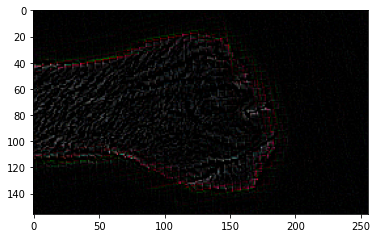

In [7]:
plt.imshow(rock_img)

In [8]:
# rock_img

In [9]:
rock_img.max()

0.9647059

In [10]:
rock_img.min()

0.0

In [11]:
rock_img.shape

(156, 256, 3)

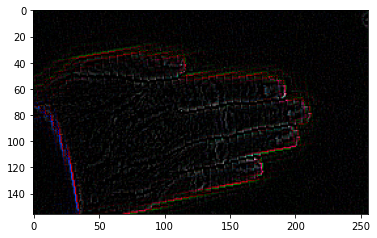

In [12]:
paper_dir = 'train_r+e\\paper\\' + os.listdir('train_r+e\\paper')[0]
paper_img = imread(paper_dir)
plt.imshow(paper_img)

In [13]:
paper_img.shape

(156, 256, 3)

In [14]:
len(os.listdir('train_r+e\\rock'))

626

In [15]:
len(os.listdir('train_r+e\\paper'))

612

In [16]:
len(os.listdir('train_r+e\\scissors'))

650

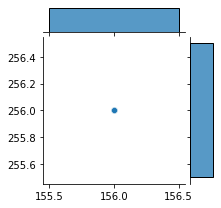

In [17]:
dim1 = []
dim2 = []
for dir1 in ['train_r+e\\','test_r+e\\']:
    for dir2 in os.listdir(dir1):
        for img_name in os.listdir(dir1 + dir2): 
            img = imread(dir1 + dir2 + '\\' + img_name)
            d1,d2,colors = img.shape
            dim1.append(d1)
            dim2.append(d2)
sns.jointplot(x=dim1,y=dim2,height=3)

<h3>preparing image generator<h3>

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
help(ImageDataGenerator)

Help on class ImageDataGenerator in module tensorflow.python.keras.preprocessing.image:

class ImageDataGenerator(keras_preprocessing.image.image_data_generator.ImageDataGenerator)
 |  Generate batches of tensor image data with real-time data augmentation.
 |  
 |   The data will be looped over (in batches).
 |  
 |  Arguments:
 |      featurewise_center: Boolean.
 |          Set input mean to 0 over the dataset, feature-wise.
 |      samplewise_center: Boolean. Set each sample mean to 0.
 |      featurewise_std_normalization: Boolean.
 |          Divide inputs by std of the dataset, feature-wise.
 |      samplewise_std_normalization: Boolean. Divide each input by its std.
 |      zca_epsilon: epsilon for ZCA whitening. Default is 1e-6.
 |      zca_whitening: Boolean. Apply ZCA whitening.
 |      rotation_range: Int. Degree range for random rotations.
 |      width_shift_range: Float, 1-D array-like or int
 |          - float: fraction of total width, if < 1, or pixels if >= 1.
 |     

In [20]:
image_gen = ImageDataGenerator(rotation_range=20,
                               width_shift_range=0.10,
                               height_shift_range=0.10,
#                                rescale=1/255,
                               shear_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode='constant',
                               cval=.0
                              )

In [21]:
rock_img[0][0][0]

0.019607844

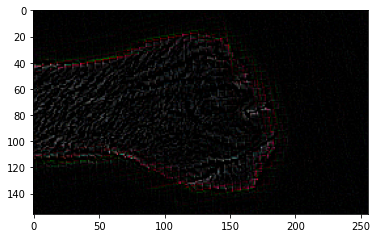

In [22]:
plt.imshow(rock_img)

In [23]:
image_gen.random_transform(rock_img)[0][0][0]

0.0

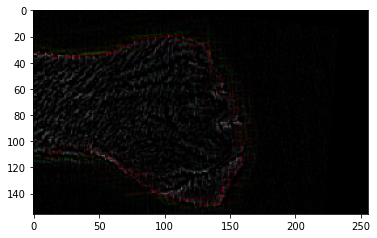

In [24]:
plt.imshow(image_gen.random_transform(rock_img))

In [25]:
image_gen.flow_from_directory('train_r+e')

Found 1888 images belonging to 3 classes.


In [26]:
image_gen.flow_from_directory('test_r+e')

Found 300 images belonging to 3 classes.


<h3>creating model<h3>

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [28]:
image_shape = (60, 90, 1)

In [29]:
#https://stats.stackexchange.com/questions/148139/rules-for-selecting-convolutional-neural-network-hyperparameters
model = Sequential()

model.add(Conv2D(filters=128, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 58, 88, 128)       1280      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 29, 44, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 42, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 21, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 19, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 9, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1440)              0

In [31]:
from tensorflow.keras.callbacks import EarlyStopping

In [32]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

<h3>training the model<3>

In [33]:
# help(image_gen.flow_from_directory)

In [34]:
batch_size = 16

In [35]:
train_image_gen = image_gen.flow_from_directory('train_r+e',
                                                target_size=image_shape[:2],
                                                color_mode='grayscale',
                                                batch_size=batch_size,
                                                class_mode='categorical')

Found 1888 images belonging to 3 classes.


In [36]:
test_image_gen = image_gen.flow_from_directory('test_r+e',
                                               target_size=image_shape[:2],
                                               color_mode='grayscale',
                                               batch_size=batch_size,
                                               class_mode='categorical',shuffle=False)

Found 300 images belonging to 3 classes.


In [37]:
train_image_gen.class_indices

{'paper': 0, 'rock': 1, 'scissors': 2}

In [38]:
results = model.fit(train_image_gen,
                    epochs=20,
                    validation_data=test_image_gen,
                    callbacks=[early_stop])

Train for 118 steps, validate for 19 steps
Epoch 1/20
118/118 [==============================] - 26s 218ms/step - loss: 1.1369 - accuracy: 0.4481 - val_loss: 0.9941 - val_accuracy: 0.4567
Epoch 2/20
118/118 [==============================] - 25s 211ms/step - loss: 1.0266 - accuracy: 0.4926 - val_loss: 0.9503 - val_accuracy: 0.6033
Epoch 3/20
118/118 [==============================] - 26s 222ms/step - loss: 0.9063 - accuracy: 0.5975 - val_loss: 0.7971 - val_accuracy: 0.7200
Epoch 4/20
118/118 [==============================] - 27s 226ms/step - loss: 0.8371 - accuracy: 0.6488 - val_loss: 0.7594 - val_accuracy: 0.7067
Epoch 5/20
118/118 [==============================] - 25s 213ms/step - loss: 0.7061 - accuracy: 0.7246 - val_loss: 0.5849 - val_accuracy: 0.7600
Epoch 6/20
118/118 [==============================] - 24s 208ms/step - loss: 0.6523 - accuracy: 0.7426 - val_loss: 0.5448 - val_accuracy: 0.7800
Epoch 7/20
118/118 [==============================] - 26s 218ms/step - loss: 0.5695 - a

In [39]:
from datetime import datetime

In [40]:
timestamp = datetime.now().strftime("%Y-%m-%d--%H-%M")

In [41]:
from tensorflow.keras.models import load_model

In [42]:
model.save('models_r+e\\' + timestamp)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: models_r+e\2020-11-13--17-29\assets


<h3>model evaluation<h3>

In [43]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

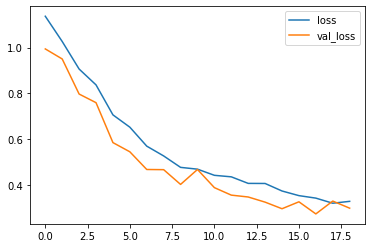

In [44]:
losses[['loss','val_loss']].plot()

<AxesSubplot:>

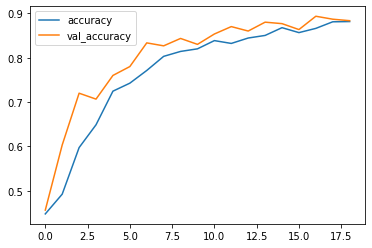

In [45]:
losses[['accuracy','val_accuracy']].plot()

In [46]:
model.metrics_names

['loss', 'accuracy']

In [47]:
model.evaluate(test_image_gen)

19/19 [==============================] - 2s 85ms/step - loss: 0.3163 - accuracy: 0.8733


[0.3162531358631034, 0.87333333]

In [48]:
pred_probabilities = model.predict(test_image_gen)

In [49]:
pred_probabilities

array([[7.18596637e-01, 1.40344456e-01, 1.41058907e-01],
       [3.93319875e-01, 5.02385315e-04, 6.06177688e-01],
       [3.98139983e-01, 2.67114222e-01, 3.34745735e-01],
       [9.76372957e-01, 5.71159180e-03, 1.79154370e-02],
       [8.68738353e-01, 3.12272197e-04, 1.30949378e-01],
       [5.50168753e-01, 3.14982593e-01, 1.34848639e-01],
       [8.17818522e-01, 7.69680692e-03, 1.74484745e-01],
       [2.61338145e-01, 2.94550732e-02, 7.09206820e-01],
       [9.96854782e-01, 8.10803067e-06, 3.13710002e-03],
       [9.05954719e-01, 5.68716787e-02, 3.71735878e-02],
       [4.09895301e-01, 3.72677922e-01, 2.17426836e-01],
       [9.89332557e-01, 8.97755905e-04, 9.76972654e-03],
       [1.45560905e-01, 2.57782027e-04, 8.54181290e-01],
       [9.96962488e-01, 5.20192028e-04, 2.51728646e-03],
       [3.98912653e-03, 3.72568229e-06, 9.96007144e-01],
       [5.57896435e-01, 3.82664334e-03, 4.38276857e-01],
       [8.49083960e-01, 8.17336664e-02, 6.91823736e-02],
       [1.99325889e-01, 2.38535

In [50]:
pred_probabilities.shape

(300, 3)

In [51]:
test_image_gen.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [52]:
from sklearn.metrics import classification_report,confusion_matrix

In [53]:
predictions = np.argmax(model.predict(test_image_gen), axis=-1)

In [54]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.89      0.71      0.79       100
           1       0.93      0.93      0.93       100
           2       0.79      0.95      0.86       100

    accuracy                           0.86       300
   macro avg       0.87      0.86      0.86       300
weighted avg       0.87      0.86      0.86       300



In [55]:
confusion_matrix(test_image_gen.classes,predictions)

array([[71,  6, 23],
       [ 5, 93,  2],
       [ 4,  1, 95]], dtype=int64)